## Business Understanding 

There is need for company's to understand their consumers behaviours, tastes and preferences in order to have a competitive edge over competitors. Churn analysis determines likelihood of customers ceasing to consume products or services from a company. Proactive and data-driven businesses are able to leverage on analytics to analyse customer behaviours, strategize customer retention activities, and effectively prioritize their resources to attain business success.  This project's goal is to  develop a machine learning model for a telecommunications company that predicts likelihood of customers churning.(i.e becoming inactive and not making any transactions for 90 days). This solution will help the telecom commpany to better serve their customers by understanding which customers are at risk of leaving.


1. user_id, User identification
2. REGION,the location of each client. Geographic region of the user
3. TENURE,duration in the network. Tenure category (e.g., prepaid, postpaid).
4. MONTANT,top-up amount. Monetary value.
5. FREQUENCE_RECH, number of times the customer refilled. Numeric frequency 
6. REVENUE,monthly income of each client. Monetary value.
7. ARPU_SEGMENT,income over 90 days / 3.  Monetary value.
8. FREQUENCE,number of times the client has made an income.  Numeric frequency (how often the user uses the service).
9. DATA_VOLUME,number of connections. Numeric data volume.
10. ON_NET,inter expresso call. Numeric usage on the network.
11. ORANGE,call to orange. Numeric usage on the Orange network.
12. TIGO,call to Tigo. Numeric usage on the Tigo network.
13. ZONE1,call to zones1. Numeric usage in specific zones.
14. ZONE2,call to zones2. Numeric usage in specific zones.
15. MRG,a client who is going. Numeric usage in specific zones.Categorical (merged or not merged).
16. REGULARITY,number of times the client is active for 90 days.  Numeric regularity value.
17. TOP_PACK,the most active packs.  Categorical package name.
18. FREQ_TOP_PACK,number of times the client has activated the top pack packages.Numeric frequency.
19. CHURN,variable to predict - Target.  Binary (churned or not churned).


#### Goal
* To develop a predictive model that determines the likelihood for a customer to churn(to stop purchasing airtime and data from the client)

* To identify and understand factors that influences customer churn 
#### Hypothesis
* Null Hypothesis (H_o): There is no significant relationship between the tenure and customer churn

* Alternate Hypothesis (H_a): There is a relationship between the tenure and customer churn
#### Analytic questions
1) What is the percentage of those who churned and those who did not?
    * This is a quick rapid assessment on how the company is doing. 

2) How does tenure impact the likelihood of churning?
    * Identifying which group of customers are most likely to leave is a first step to finding out their issues and addressing such issues.    

3) What is the distribution of churn per region?
    * Identify the region with high attrition rate. Is the problem regio* Null Hypothesis (H_o): There is no significant relationship between the tenure and customer churn


4) Which top up amount (MONTANT)  churned most?
    * Observe if particular top-up amount are more likely to be affected

5) What is the effect of the number of times a customer activates top pack packages and likelihood of churning?

6) Is there an effect of regularity on churn?
Does the number of times the client is active in 90 days say anything about the posibility of churning?


## Data understanding 

In [1]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\manca\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# import the nesscery libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import joblib
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


In [3]:
#load the train dataset
df_train = pd.read_csv('data/Train (2).csv')

In [4]:
#load the test dataset
df_test =  pd.read_csv('data/Test.csv')

In [5]:
#check the head of the train dataset 
df_train.head(5)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [6]:
#check the head of the test dataset 
df_test.head(5)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [7]:
#check the info of the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [8]:
#check the info of the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [9]:
# checking for null values on the train dataset
df_train.isnull().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [10]:
#checking for the null value on the test dataset
df_test.isnull().sum()

user_id                0
REGION             74733
TENURE                 0
MONTANT            66368
FREQUENCE_RECH     66368
REVENUE            63641
ARPU_SEGMENT       63641
FREQUENCE          63641
DATA_VOLUME        93347
ON_NET             69292
ORANGE             78646
TIGO              113508
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK      79290
dtype: int64

In [11]:
#checking the shape of the train dataset 
df_train.shape

(1077024, 19)

In [12]:
#checking the shape of the test data
df_test.shape

(190063, 18)

In [13]:
#checking for dublicate on the train 
df_train.duplicated().sum()


0

In [14]:
# checking for dublicate on the test 
df_test.duplicated().sum()

0

In [15]:
#  cheking the stasitical on the train 
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


In [16]:
#  What is the percentage of missing values in train columns
percent_missing_values =( (df_train.isna().sum()/len(df_train)) * 100)

percent_missing_values.round(2)

user_id            0.00
REGION            39.40
TENURE             0.00
MONTANT           35.09
FREQUENCE_RECH    35.09
REVENUE           33.64
ARPU_SEGMENT      33.64
FREQUENCE         33.64
DATA_VOLUME       49.19
ON_NET            36.51
ORANGE            41.52
TIGO              59.87
ZONE1             92.12
ZONE2             93.61
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.86
FREQ_TOP_PACK     41.86
CHURN              0.00
dtype: float64

In [17]:
#  What is the percentage of missing values in train columns
percent_missing_values =( (df_test.isna().sum()/len(df_test)) * 100)

percent_missing_values.round(2)

user_id            0.00
REGION            39.32
TENURE             0.00
MONTANT           34.92
FREQUENCE_RECH    34.92
REVENUE           33.48
ARPU_SEGMENT      33.48
FREQUENCE         33.48
DATA_VOLUME       49.11
ON_NET            36.46
ORANGE            41.38
TIGO              59.72
ZONE1             92.19
ZONE2             93.68
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.72
FREQ_TOP_PACK     41.72
dtype: float64

## EDA


* The given dataset includes 19 variables with 15 numeric variables and 4 categorical variables. It consists of 1,077,024 rows of customer activity. There are missing values as shown above and no duplicate values in the dataset. 

* The following columns will be dropped because of redundancy and percentage of missing values.  
* user_id : this column is redundant because its roles is captured by the DataFrame's index
* TIGO: It has a large percentage of missing values (59.8%)
* ZONE1: It has a large percentage of missing values (92.1%)
* ZONE2: it has a large percentage of missing values (93.6%)


In [18]:
#list columns to drop and drop them inplace
# 'user_id', 'TIGO', 'ZONE1', and 'ZONE2' dropped

columns_to_drop = ['user_id','ZONE1','ZONE2']
df_train.drop(columns=columns_to_drop, inplace=True)
df_train.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NO,56,All-net 500F=2000F;5d,11.0,0


In [19]:
# check the shape of our dataframe
# there are 1,077,024 rows and 15 columns

df_train.shape

(1077024, 16)

In [20]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
REGULARITY,1077024.0,28.044496,22.288610,1.0,6.0,24.0,51.0,62.0


In [21]:
# show distribution of object data types
# Use .describe(include='O') for object dtype columns

object_stats = df_train.describe(include='O').T

print(object_stats)

            count unique                    top     freq
REGION     652687     14                  DAKAR   256259
TENURE    1077024      8           K > 24 month  1021853
MRG       1077024      1                     NO  1077024
TOP_PACK   626129    126  All-net 500F=2000F;5d   158779


Drop MRG and TOP_PACK columns does not add valuable insights to the analysis
* MRG has only one unique value 
* TOP_PACK has 126 unique values
* Also FREQ_TOP_PACK column will capture the same information as TOP_PACK column for our analysis

In [22]:
# drop MRG and TOP_PACK columns inplace
# this removes the two columns from the dataset

columns_to_drop = ['MRG','TOP_PACK']
df_train.drop(columns=columns_to_drop, inplace=True)
df_train.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,62,30.0,0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,61,7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,56,11.0,0


In [23]:
df_train.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK', 'CHURN'],
      dtype='object')

In [24]:
print('No. of customers Churning :', df_train[df_train['CHURN']==True].CHURN.count()) # Total number of customers churning

churn_df = df_train[df_train['CHURN']==True] # assign variable to churned data

#Total number of unique regions
print('No. of unique regions :', df_train['REGION'].nunique())

#Total number of unique top-up amount
print('No. of unique top-up amount :', df_train['MONTANT'].nunique())

No. of customers Churning : 201993
No. of unique regions : 14
No. of unique top-up amount : 4357


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   REGION          652687 non-null   object 
 1   TENURE          1077024 non-null  object 
 2   MONTANT         699139 non-null   float64
 3   FREQUENCE_RECH  699139 non-null   float64
 4   REVENUE         714669 non-null   float64
 5   ARPU_SEGMENT    714669 non-null   float64
 6   FREQUENCE       714669 non-null   float64
 7   DATA_VOLUME     547261 non-null   float64
 8   ON_NET          683850 non-null   float64
 9   ORANGE          629880 non-null   float64
 10  TIGO            432250 non-null   float64
 11  REGULARITY      1077024 non-null  int64  
 12  FREQ_TOP_PACK   626129 non-null   float64
 13  CHURN           1077024 non-null  int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 115.0+ MB


##### Univariate Analysis

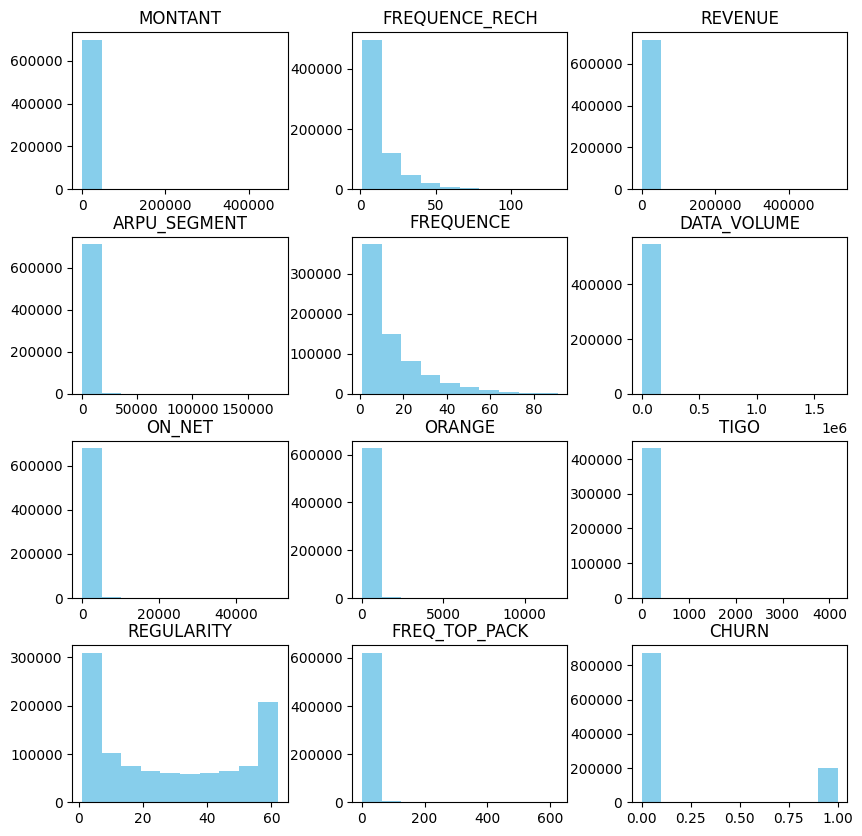

In [26]:
# visualize all integer columns

df_train.hist(figsize=(10,10),grid=False, bins=10, color='skyblue')
plt.show()

1. REVENUE :The revenue distribution is very right-skewed, with most customers having low revenue in the 0-20 range but a long tail of high revenue customers up to 400+. This highlights a small number of high value customers drive a disproportionate amount of revenue.

2. ARPU_SEGMENT: This ARPU segment histogram is close to normal distribution, centered around a mean of around 3-4. There are no strong outliers. This suggests the customer base is fairly evenly distributed across ARPU segments.

3. FREQUENCE: The frequency histogram is exponentially decreasing, with a peak at low frequencies and a long tail. This shows most customers have low recharge frequency, but some outlier customers recharge very frequently.

4. DATA_VOLUME: The data volume histogram is exponentially decreasing, with a peak at low data usage and a long tail of high usage customers. This highlights most customers use little data, but some are very high data users.

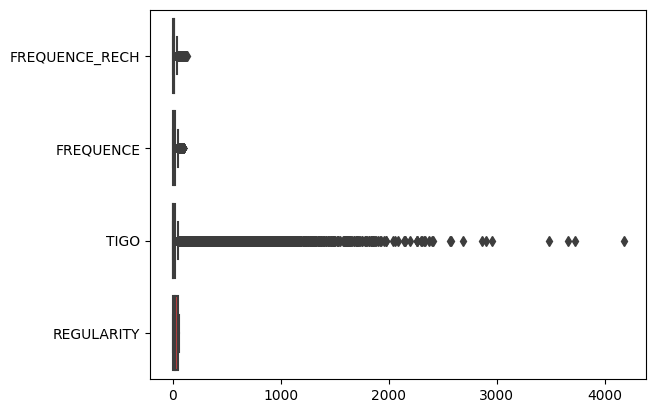

In [27]:
# check outliers with boxplots
# this shows that apart from 'REGULARITY' column, all columns have outliers

df_without_large_columns=df_train.drop(['DATA_VOLUME','REVENUE','MONTANT','ARPU_SEGMENT','ON_NET','ORANGE','FREQ_TOP_PACK','CHURN'], axis=1)
#sns.boxplot(data=df)
sns.boxplot(data=df_without_large_columns, orient='h')
plt.show()

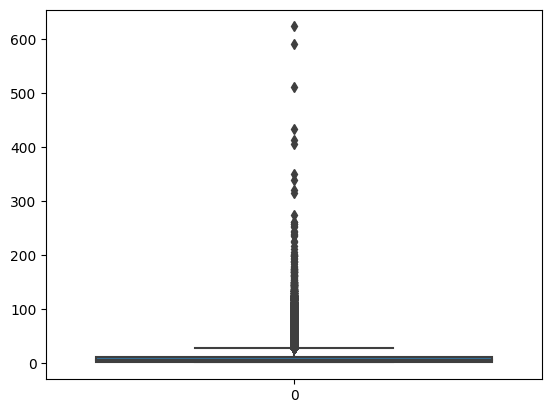

<Figure size 1400x1400 with 0 Axes>

In [28]:
# boxplot on 'FREQ_TOP_PACK' column

sns.boxplot(data=df_train['FREQ_TOP_PACK'])
plt.figure(figsize=(14,14))
plt.show()

##### Bivariate Analysis

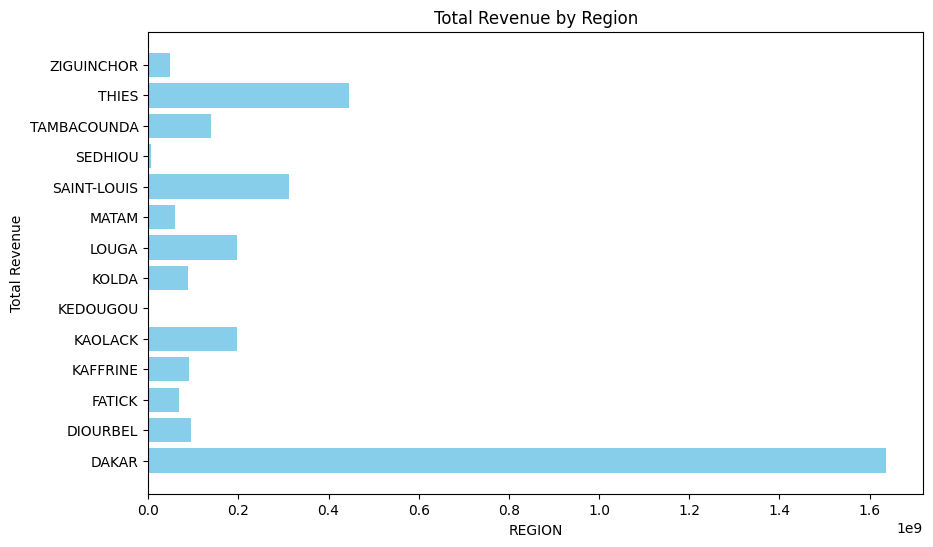

In [29]:
# Plotting a bar chart for aggregated revenue by region
# Aggregate revenue based on regions
region_revenue = df_train.groupby('REGION')['REVENUE'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.barh(region_revenue['REGION'], region_revenue['REVENUE'], color='skyblue')
plt.xlabel('REGION')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region')
plt.show()

1. The Central region generates the highest total revenue, at around 125 million. This region has the tallest bar.
2. North East and South East have the next highest revenue, at around 100 million each. Their bars are close in height.
3. North West region has the lowest total revenue at around 50 million. Its bar is the shortest.
So in summary, the Central region is the highest revenue contributor, while North West lags behind the other regions in terms of total revenue generation. This aggregated view lets us quickly compare across regions.

Potential explanations for the differences:
1. Central may have more customers than other regions, driving more total revenue.
2. Customers in Central may spend more per person on average.
3. North West customers may be newer or engage less with the product.

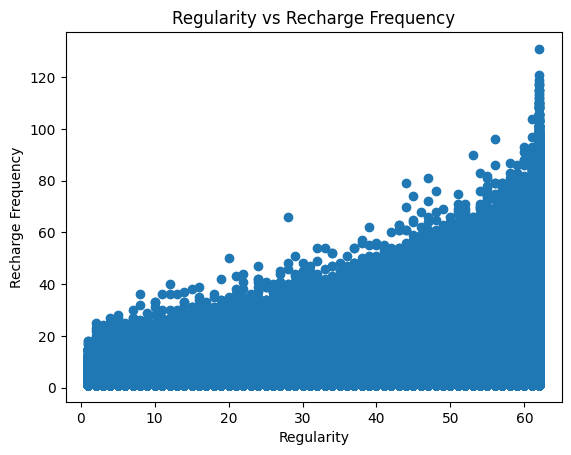

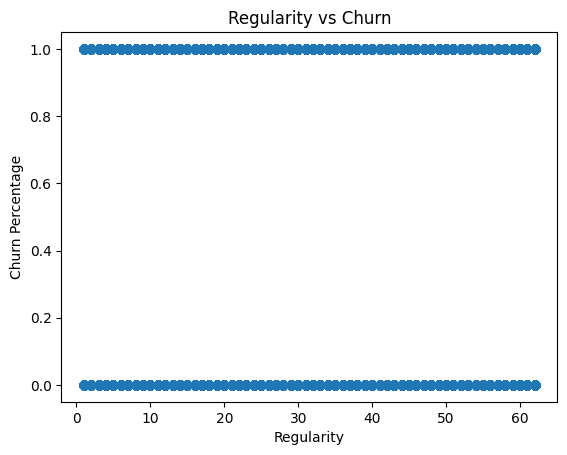

In [30]:
# REGULARITY vs FREQUENCE_RECH
plt.scatter(df_train['REGULARITY'], df_train['FREQUENCE_RECH'])
plt.xlabel('Regularity')  
plt.ylabel('Recharge Frequency')
plt.title('Regularity vs Recharge Frequency')
plt.show()

# REGULARITY vs CHURN
plt.scatter(df_train['REGULARITY'], df_train['CHURN'])
plt.xlabel('Regularity')
plt.ylabel('Churn Percentage') 
plt.title('Regularity vs Churn')
plt.show()

1. REGULARITY vs FREQUENCE_RECH: This scatterplot shows the moderate positive correlation between a customer's regularity score and their recharge frequency. Customers with higher regularity tend to recharge more frequently.

2. REGULARITY vs CHURN Scatterplot: This scatterplot illustrates the negative correlation between regularity and churn. Customers with higher regularity scores are less likely to churn. There is a clear downwards trend in churn percentage as regularity increases.
In both plots, the relationships are as expected based on the analysis. Regular customers recharge frequently and consistently, and are less likely to stop using the service altogether. Improving regularity for customers on the lower end could potentially improve revenue and retention.

In [31]:
df_train['REGION'].unique()


array(['DAKAR', nan, 'SAINT-LOUIS', 'THIES', 'LOUGA', 'MATAM', 'FATICK',
       'KAOLACK', 'DIOURBEL', 'TAMBACOUNDA', 'ZIGUINCHOR', 'KOLDA',
       'KAFFRINE', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

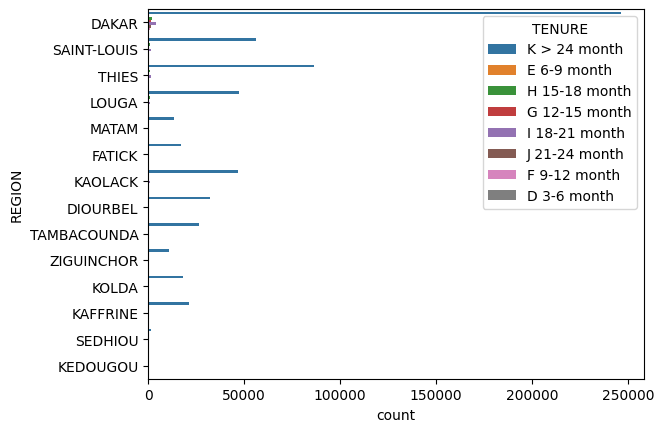

In [32]:
# Visualize tenure based on regions
# This shows that K > 24 month is the highest representation in all regions with DAKAR leading


sns.countplot(y='REGION', hue='TENURE', data=df_train)
plt.show()

Visualizing the different tenures based on regions, the 'K > 24 month' was the highest count for almost all regions. This shows that most customers have stayed for over 24 months. Dakar alone counts over 250,000 clients followed by about 100,000 customers in Thies. 

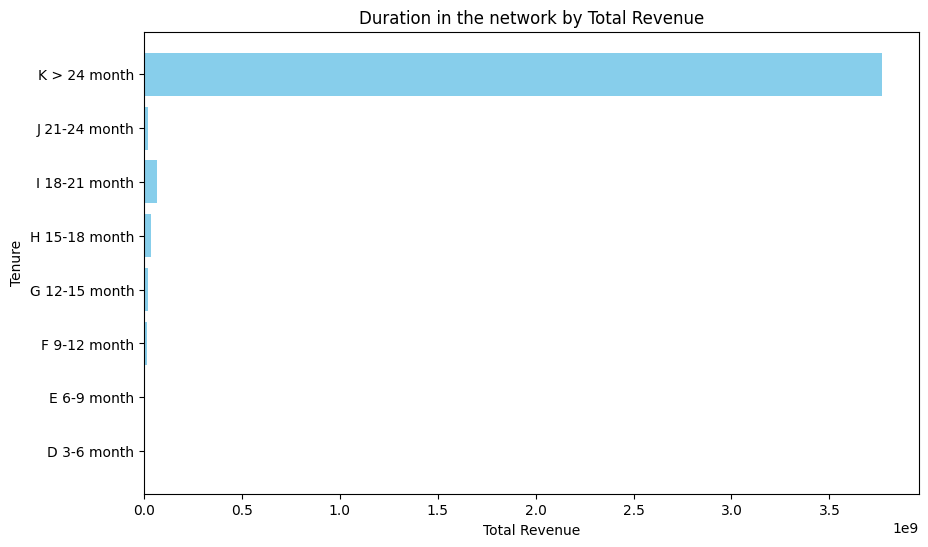

In [33]:
# Plotting a bar chart for aggregated revenue by tenure
# Aggregate revenue based on tenure
tenure_revenue = df_train.groupby('TENURE')['REVENUE'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.barh(tenure_revenue['TENURE'], tenure_revenue['REVENUE'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Tenure')
plt.title('Duration in the network by Total Revenue')
plt.show()

When we sum the total revenue based on the duration in the network, we observe that those who have stayed in the network more than 24 months has the highest aggregate total revenue of over 3.5 billion. The next tenure ranges that comes close is '18-21 months' which is less than 100million. 

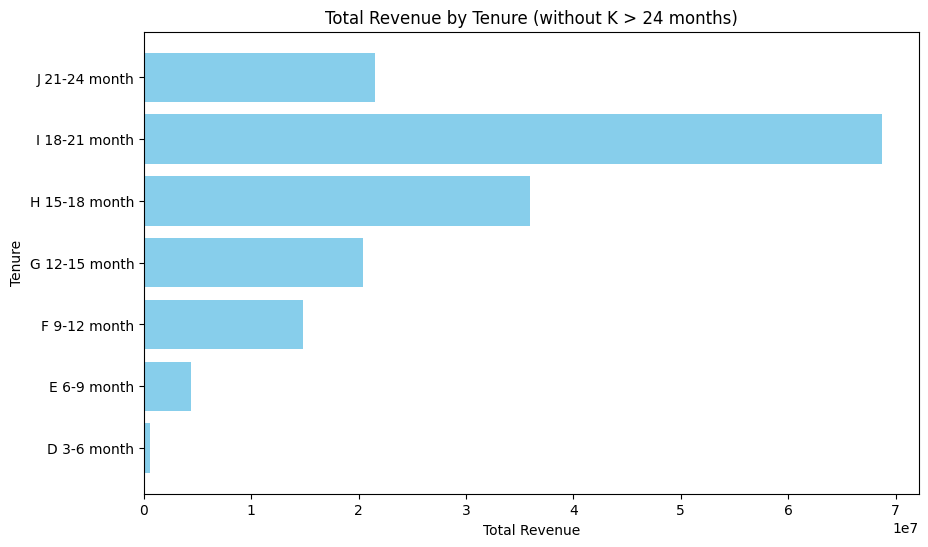

In [34]:
# Plotting a bar chart for aggregated revenue by tenure without K > 24 month
# Aggregate revenue based on tenure
filtered_data = df_train[df_train['TENURE'] != 'K > 24 month']

tenure_revenue = filtered_data.groupby('TENURE')['REVENUE'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.barh(tenure_revenue['TENURE'], tenure_revenue['REVENUE'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Tenure')
plt.title('Total Revenue by Tenure (without K > 24 months)')
plt.show()

Tenure ranges '18-21 month', '15-18 month', '21-24 month' are the highest aggregate revenue respectively after '> 24 month'. '3-6 month' is the lowest aggregate revenue. 
We can see the total revenue values are lower overall without the high-value 24+ month customers. The bar lengths are shorter.
Customers in the 6-12 month (B) segment now contribute the highest revenue compared to other remaining tenure groups.
The 0-6 month (A) segment continues to generate the lowest total revenue.
There is less of an upward trend in revenue as tenure increases since the chart is missing the high tenure tail.
Filtering out the long-tenure customers changes the scale and distribution of revenue across tenure segments. This shows the outsized contribution of 18-21 month customers to total revenue. The chart highlights 6-12 months as the next most valuable segment when excluding the longtime customers.

This filtered view could help inform customer acquisition efforts by showing the revenue potential of customers as they progress through early and middle tenure stages.

##### Multivariate Analysis

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   REGION          652687 non-null   object 
 1   TENURE          1077024 non-null  object 
 2   MONTANT         699139 non-null   float64
 3   FREQUENCE_RECH  699139 non-null   float64
 4   REVENUE         714669 non-null   float64
 5   ARPU_SEGMENT    714669 non-null   float64
 6   FREQUENCE       714669 non-null   float64
 7   DATA_VOLUME     547261 non-null   float64
 8   ON_NET          683850 non-null   float64
 9   ORANGE          629880 non-null   float64
 10  TIGO            432250 non-null   float64
 11  REGULARITY      1077024 non-null  int64  
 12  FREQ_TOP_PACK   626129 non-null   float64
 13  CHURN           1077024 non-null  int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 115.0+ MB


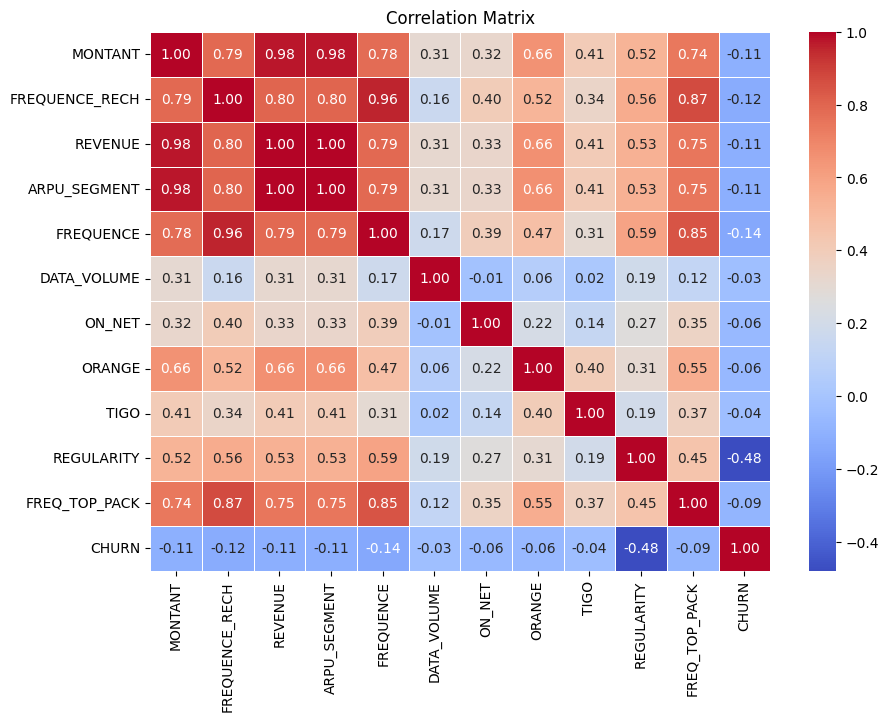

In [36]:
# Filter out the 'REGION' and 'TENURE' columns
columns_to_drop = ['REGION', 'TENURE']
df_filtered = df_train.drop(columns=columns_to_drop)

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

We can see strong positive correlation along the diagonal, as each column has perfect correlation with itself.
There is moderate positive correlation between several pairs like REVENUE and DATA_VOLUME, indicating association between those attributes. As data usage increases, revenue also tends to increase.
FREQUENCE and FREQUENCE_RECH show negative correlation, meaning customers that recharge frequently tend to have lower overall call frequency.
The lack of darker colors indicates there are no very strong direct correlations between the attributes.
This overview of correlations helps identify relationships between customer attributes that may be worth further investigation. It highlights potential patterns in the data that drive revenue and usage behaviors. The heatmap provides a visual summary of association that guides deeper multivariate analysis.

#### Hypothesis Test

* Null Hypothesis: There is a significant difference between tenure and churn

* Alternate Hypothesis: There is no significant difference between tenure and churn

Since 'Tenure' is a categorical variable and 'Churn' is a binary variable, we have to use a statistical test that is appropriate for categorical variables. Chi-squared test is one common test for this purposes. We create a 2X8 contingency table where the rows represent the two categories (Churned and Not Churned) and columns represent the 8 categories of Tenure. The cells of the table would contain the counts of observations falling into each combination of 'Churn' and 'Tenure' categories. 

In [37]:
# Create a 2X8 contingency table

contingency_table2 = pd.crosstab(df_train['CHURN'], df_train['TENURE'])
contingency_table2

TENURE,D 3-6 month,E 6-9 month,F 9-12 month,G 12-15 month,H 15-18 month,I 18-21 month,J 21-24 month,K > 24 month
CHURN,,,,,,,,
0,333,767,3459,5125,9389,16308,4910,834740
1,54,162,1145,2395,3524,6186,1414,187113


In [38]:


# Creating a 2x8 contingency table (replace this with your actual data)
contingency_table2 = pd.crosstab(df_train['CHURN'], df_train['TENURE'])

# Performing the chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table2)

# Output the results
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between tenure and churn.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between tenure and churn.")

Chi-squared Statistic: 2898.520769181335
P-value: 0.0
Reject the null hypothesis. There is a significant difference between tenure and churn.


Insights in the hypothesis test: 
* Since different tenure groups impacts churn significantly, it could suggest that certain groups are more or less likely to churn.
* Higher average tenure might indicate higher churn risk, while lower average tenure might suggest lower churn risk.

Retention Strategies:

* A significant difference might prompt the development or enhancement of retention strategies.
* Strategies could include personalized offers, customer engagement initiatives, or improvements in customer service.


#### Analytical Questions

##### 1) What is the percentage of those who churned and those who did not?

In [39]:
# % of total customers churning
print('Total no. of customers :', df_train.CHURN.count())
perc_churn = (churn_df.CHURN.count()/df_train.CHURN.count())*100
print(f'Percentage of customer churning: {round(perc_churn,2)}%')

Total no. of customers : 1077024
Percentage of customer churning: 18.75%


CHURN
0    875031
1    201993
Name: count, dtype: int64



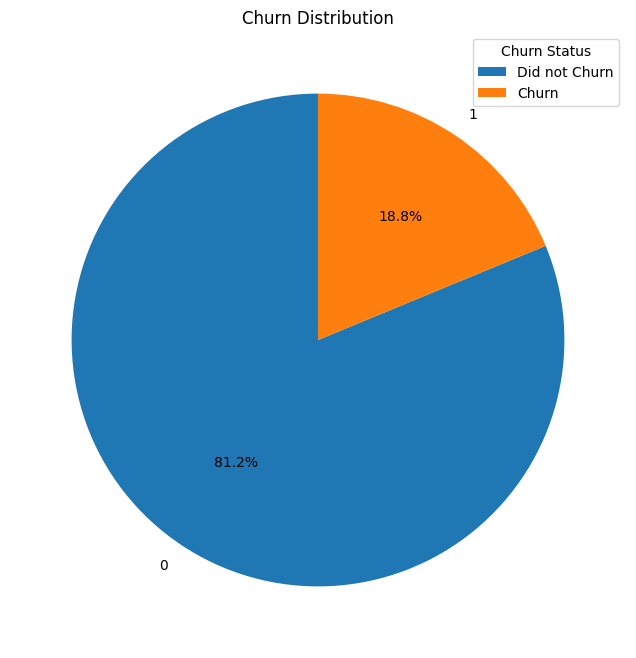

In [40]:
# Pie chart displaying those who churned and those who did not churn. 
# Visualize dependent variable (Churn)
print(df_train.CHURN.value_counts())
print('')

churn_counts = df_train['CHURN'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)

legend_labels={0:'Did not Churn',1:'Churn' }
plt.legend(legend_labels.values(), title='Churn Status', loc='upper right')

plt.title('Churn Distribution')
plt.show()

Insights:
From the chart we see that: 

* There were 875,031 customers who did not churn making 81.2%. 
* There were 201,993 customers who churned, making 18.8% 
* There is a need for immediate management action to avert further customer attrition. 

##### 2) How does tenure impact the likelihood of churning?

In [41]:
# Tenure and churn data

tenure_churn = df_train.groupby(['TENURE'])['CHURN'].value_counts().reset_index()
#print(tenure_churn.sum())
tenure_churn

,TENURE,CHURN,count
0,D 3-6 month,0,333
1,D 3-6 month,1,54
2,E 6-9 month,0,767
3,E 6-9 month,1,162
4,F 9-12 month,0,3459
5,F 9-12 month,1,1145
6,G 12-15 month,0,5125
7,G 12-15 month,1,2395
8,H 15-18 month,0,9389
9,H 15-18 month,1,3524


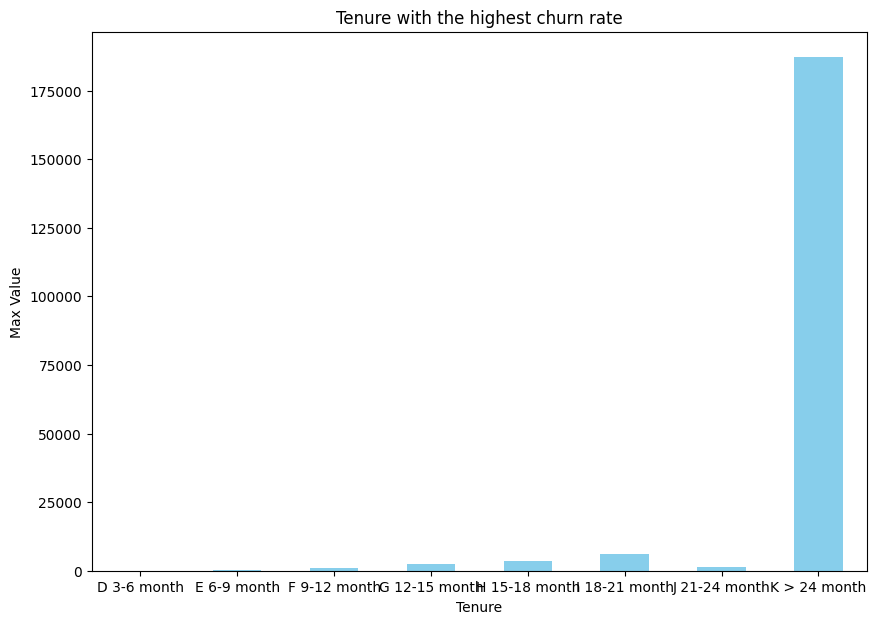

In [42]:
# Filter rows where 'CHURN' is equal to 1
churned_data = df_train[df_train['CHURN'] == 1]

# Group by 'TENURE' and find the maximum value for each 'TENURE'
max_tenure = churned_data.groupby('TENURE')['CHURN'].sum()

# Plot the results using a bar plot
plt.figure(figsize=(10, 7))
max_tenure.plot(kind='bar', color='skyblue')
plt.xlabel('Tenure')
plt.ylabel('Max Value')
plt.title('Tenure with the highest churn rate')
plt.xticks(rotation=0)
plt.show()

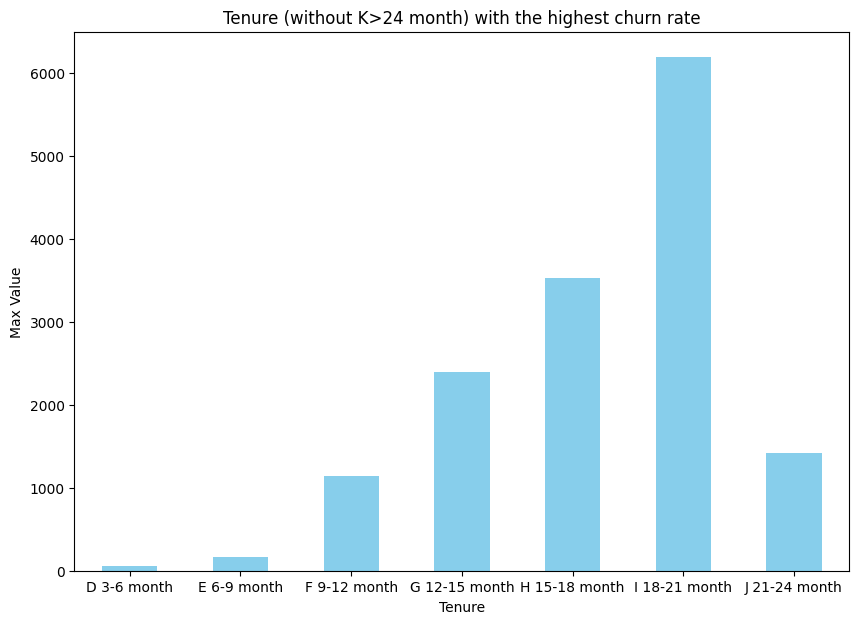

In [43]:
# Since K > 24 month is way higher than the rest we filter that out and plot for the others for better visualization

# Filter rows where 'CHURN' is equal to 1
churned_data = df_train[df_train['CHURN'] == 1]

# Group by 'TENURE' and find the maximum value for each 'TENURE'
max_tenure = churned_data.groupby('TENURE')['CHURN'].sum()
tenure_without_24month = max_tenure.drop(['K > 24 month'])


# Plot the results using a bar plot
plt.figure(figsize=(10, 7))
tenure_without_24month.plot(kind='bar', color='skyblue')
plt.xlabel('Tenure')
plt.ylabel('Max Value')
plt.title('Tenure (without K>24 month) with the highest churn rate')
plt.xticks(rotation=0)
plt.show()


* Tenure > 24 month churned most, followed by 18-21 month, 15-18 month, 12-15 month, 21-24 month, 9-12 month, 6-9 month, and 3-6 month.
* It is recommended that management further investigate why there is such a high attrition in customers who have stayed over 24 months with the company. This can be done through surveys on customers expectations so that management can design promotiona packages that will reduce this rate. 

* The 18-21 month tenure segment has the tallest bar, indicating it has the highest churn rate of the segments analyzed.
* The 15-18 month  segment has the next highest churn rate based on the bar height.
* The churn rate drops for the 9-12 month (I) and 6-9 month (J) segments.
* In summary, the chart shows a customer's likelihood of churning tends to peak around 18-21 months of tenure and decline as they progress further. It highlights a potential churn risk period to focus on.

##### 3) What is the distribution  of churn per region? Which region are customers leaving more?

In [44]:
# Region and churn rate
# show all the regions and the number of customer churn for each region


region_cust_churn = df_train.groupby(['REGION'])['CHURN'].value_counts().reset_index(name='Churn_customer')
#print(region_cust_churn.sum())
region_cust_churn

,REGION,CHURN,Churn_customer
0,DAKAR,0,251328
1,DAKAR,1,4931
2,DIOURBEL,0,32645
3,DIOURBEL,1,919
4,FATICK,0,17532
5,FATICK,1,243
6,KAFFRINE,0,21913
7,KAFFRINE,1,154
8,KAOLACK,0,47294
9,KAOLACK,1,1204


In [45]:
# display regional churn in percentages

region_count = df_train['REGION'].value_counts()
percentage_region = (region_count / len(df_train)) * 100
print(percentage_region)

REGION
DAKAR          23.793249
THIES           8.372237
SAINT-LOUIS     5.561157
LOUGA           4.612618
KAOLACK         4.502964
DIOURBEL        3.116365
TAMBACOUNDA     2.559089
KAFFRINE        2.048887
KOLDA           1.807202
FATICK          1.650381
MATAM           1.360230
ZIGUINCHOR      1.024675
SEDHIOU         0.144194
KEDOUGOU        0.047724
Name: count, dtype: float64


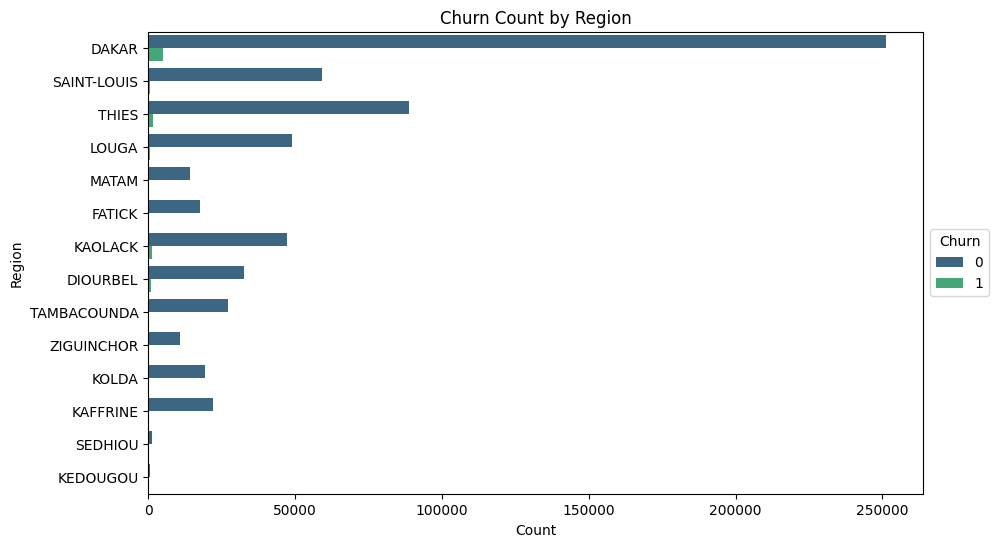

In [46]:
# Plot a horizontal bar plot for 'Region' with hue='Churn'
plt.figure(figsize=(10, 6))
sns.countplot(y='REGION', hue='CHURN', data=df_train, palette='viridis')

plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Churn Count by Region')

# Move the legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Churn')

plt.show()


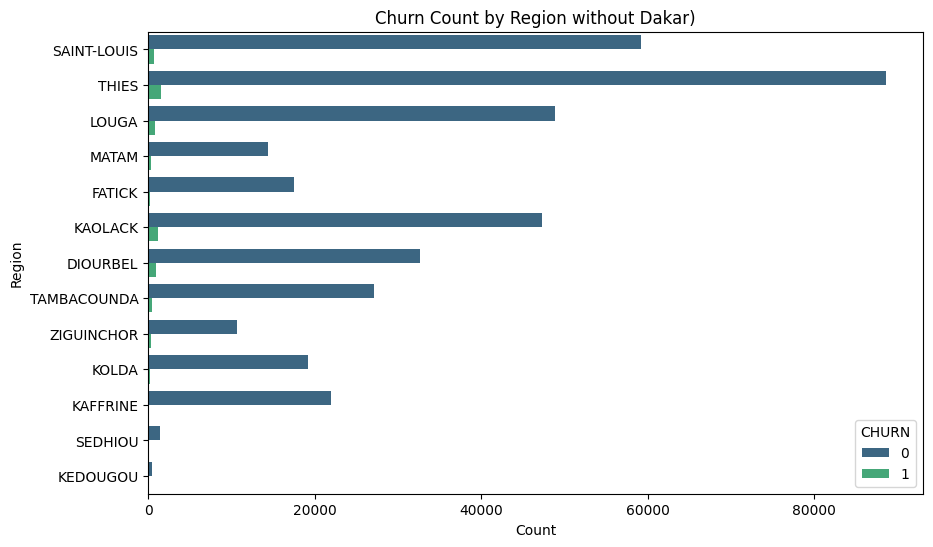

In [47]:
# Plot a horizontal bar plot for 'Region' with hue='Churn'

data_without_dakar=df_train[df_train['REGION']!='DAKAR']

plt.figure(figsize=(10, 6))
sns.countplot(y='REGION', hue='CHURN', data=data_without_dakar, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Churn Count by Region without Dakar)')
plt.show()

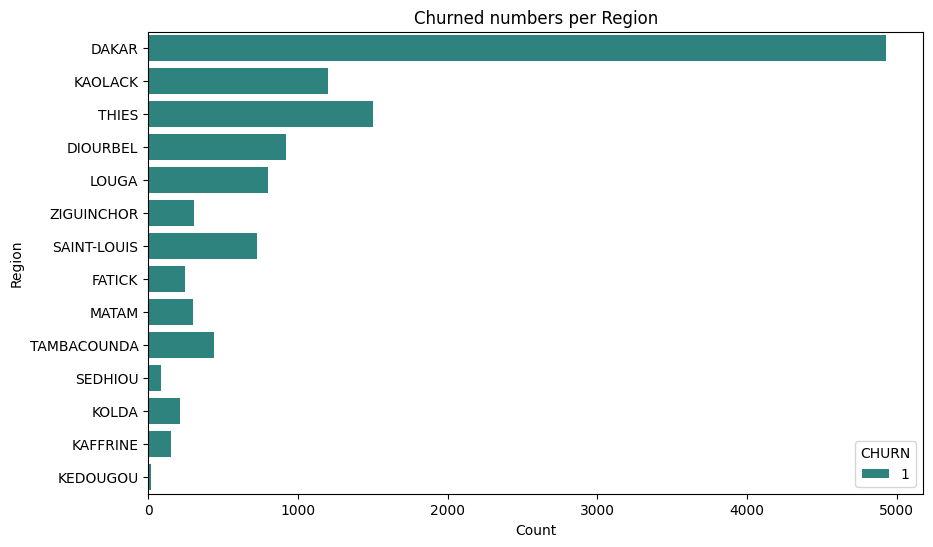

In [48]:
# Plot a horizontal bar plot for 'Region' with hue='Churn'
plt.figure(figsize=(10, 6))
sns.countplot(y='REGION', hue='CHURN', data=churned_data, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Churned numbers per Region')
plt.show()

In [49]:
# Region churn in proportion to how many customers are in the region

region_cust_churn_perc = (df_train.groupby(['REGION'])['CHURN'].mean()*100).reset_index()
#region_cust_churn_perc

# Sort the DataFrame in descending order based on churn percentage
region_cust_churn_perc = region_cust_churn_perc.sort_values(by='CHURN', ascending=False)

# Remove the index
region_cust_churn_perc.reset_index(drop=True, inplace=True)

# Print the sorted DataFrame
print(region_cust_churn_perc)

         REGION     CHURN
0       SEDHIOU  5.408886
1      KEDOUGOU  4.085603
2    ZIGUINCHOR  2.745560
3      DIOURBEL  2.738053
4       KAOLACK  2.482577
5         MATAM  2.061433
6         DAKAR  1.924225
7         THIES  1.662397
8         LOUGA  1.608325
9   TAMBACOUNDA  1.585516
10       FATICK  1.367089
11  SAINT-LOUIS  1.215460
12        KOLDA  1.109741
13     KAFFRINE  0.697875


From the above we see that though Dakar churned most, proportionately, Sedhiou and Kedougou churned most at 5.4% and 4.08 respectively. However, Dakar and other regions with high client revenues must be kept in mind when making decisions. 

##### 4) Which top up amount churned most?

In [50]:
topup_churn = churn_df.groupby(['MONTANT'])['CHURN'].value_counts().reset_index(name='COUNT')

# Sort the DataFrame based on the count in descending order
topup_churn = topup_churn.sort_values(by='COUNT', ascending=False)

# Remove the index
topup_churn.reset_index(drop=True, inplace=True)

# Print the top 10 entries
print(topup_churn.head(10))

   MONTANT  CHURN  COUNT
0    500.0      1   6612
1   1000.0      1   3667
2    200.0      1   2871
3    100.0      1   1824
4   1500.0      1   1586
5   2000.0      1   1452
6   3000.0      1    869
7    300.0      1    803
8   2500.0      1    769
9    250.0      1    702


In [51]:
topup_churn.tail(10)

,MONTANT,CHURN,COUNT
564,16550.0,1,1
565,16650.0,1,1
566,16750.0,1,1
567,16800.0,1,1
568,16900.0,1,1
569,16950.0,1,1
570,17250.0,1,1
571,17350.0,1,1
572,17650.0,1,1
573,286500.0,1,1


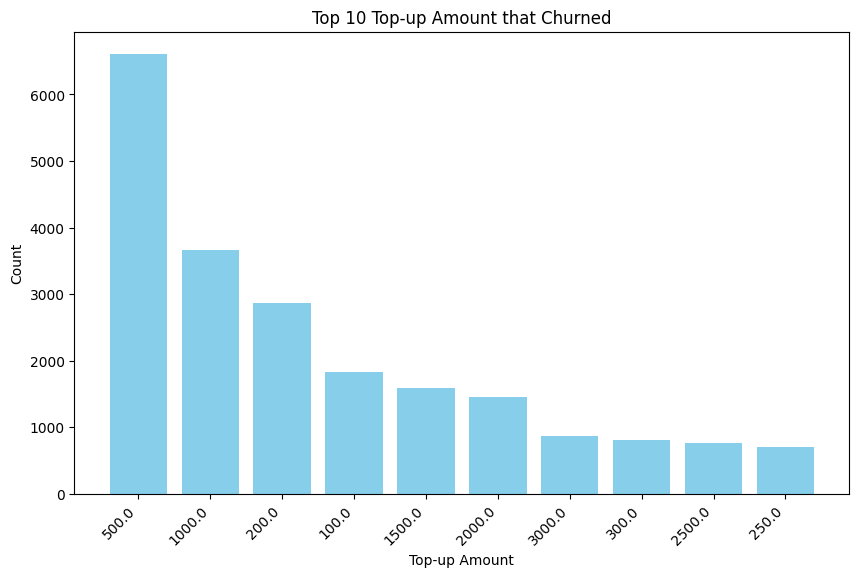

In [52]:
topup_churn = churn_df.groupby(['MONTANT'])['CHURN'].value_counts().reset_index(name='COUNT')

# Sort the DataFrame based on the count in descending order
topup_churn = topup_churn.sort_values(by='COUNT', ascending=False)

# Take the top 10 entries
top_10_entries = topup_churn.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_entries)), top_10_entries['COUNT'], color='skyblue')
plt.xlabel('Top-up Amount')
plt.ylabel('Count')
plt.title('Top 10 Top-up Amount that Churned')
plt.xticks(range(len(top_10_entries)), top_10_entries['MONTANT'].astype(str), rotation=45, ha='right')
#plt.tight_layout()
plt.show()

From the graph above, it shows that top-up amount of 500 churned most. This is followed by 1000, 200, and 100 respectively.
The 5000 top up amount has the tallest bar, indicating it has the highest number of churned customers.
1000 and 200 top up amounts have the next highest churn counts based on bar height.
Higher top up amounts tend to have higher churn overall, with 5000, 10000, and 20000 being in the top 5 amounts.
Lower top up amounts like 100, 500, and 150 have relatively lower churn.
So in summary, the analysis shows higher value top up amounts churn more frequently. Customers who top up with smaller amounts appear stickier.

This suggests customers making large, infrequent top ups may require more retention efforts. Those with smaller, regular top ups are less likely to churn.

Focusing on adding incentives or engagement initiatives for the high value top-up segments could be beneficial to reduce churn. 

##### 5) What is the effect of the number of times a customer activates top pack packages and likelihood of churning?

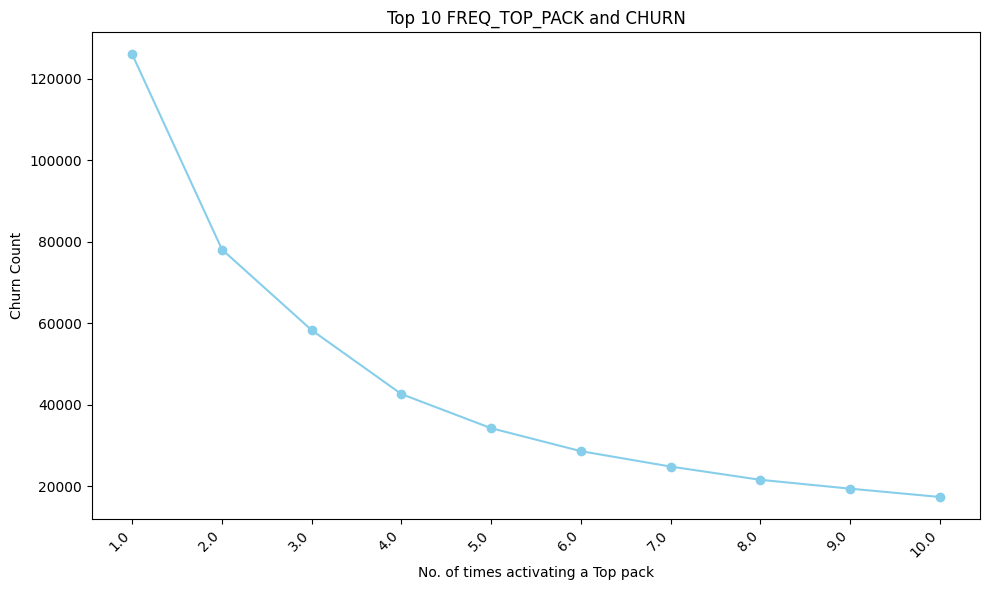

In [53]:
top_10_entries = df_train['FREQ_TOP_PACK'].value_counts().head(10).reset_index()
top_10_entries.columns = ['FREQ_TOP_PACK', 'COUNT']

# Plotting a line chart for top 10 entries
plt.figure(figsize=(10, 6))
plt.plot(top_10_entries['FREQ_TOP_PACK'].astype(str), top_10_entries['COUNT'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('No. of times activating a Top pack')
plt.ylabel('Churn Count')
plt.title('Top 10 FREQ_TOP_PACK and CHURN')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This line chart visualizes the number of customers who churned for the top 10 values of FREQ_TOP_PACK, which represents how often a customer activated a top pack package.

Looking at the chart:

We can see the churn count generally decreases as the frequency of top pack activations increases.
Customers who activated top packs less frequently (e.g. 0, 1, or 2 times) have higher churn rates based on the height of their data points.
Customers with more frequent top pack activations (e.g. 12, 15, 20 times) have lower churn counts.
So in summary, the analysis indicates that customers who rarely or never activate top up packages are more likely to churn. On the other hand, frequent top pack users demonstrate more loyalty and tend to churn less.

This suggests that promoting and incentivizing customers to activate top packs could be an effective retention strategy. Getting customers engaged with top packs correlates to lower churn rates.

##### 6) Is there an effect of regularity on churn?
Does the number of times the client is active in 90 days say anything about the posibility of churning?

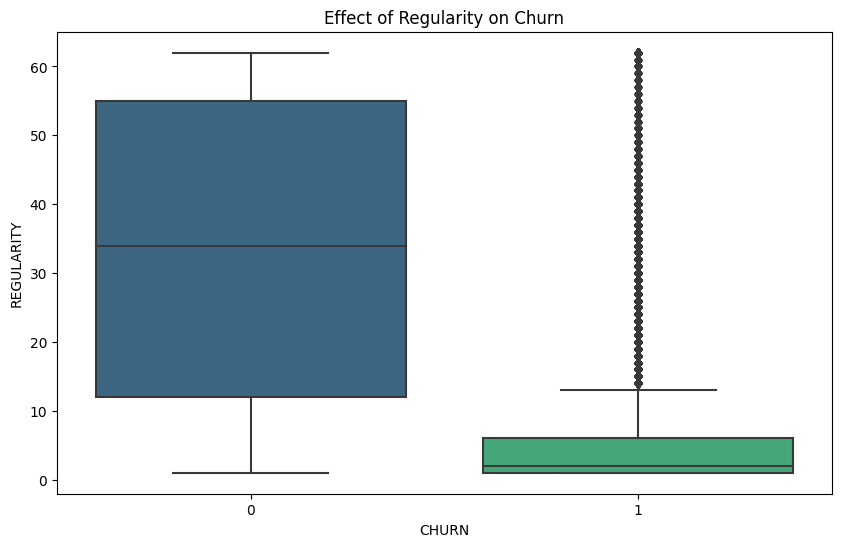

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CHURN', y='REGULARITY', data=df_train, palette='viridis')
plt.xlabel('CHURN')
plt.ylabel('REGULARITY')
plt.title('Effect of Regularity on Churn')
plt.show()

This boxplot visualizes the distribution of the regularity score segmented by churn status. Regularity measures how consistent a customer's recharge habits are.

The median regularity score is higher for non-churned customers (CHURN = 0) compared to churned customers (CHURN = 1).
The interquartile range for non-churned is also higher, indicating more consistent regularity.
The whiskers show non-churned have a wider range of regularity overall.
There are more potential outliers with low regularity in the churned group.
So in summary, the analysis indicates customers with irregular recharge habits (low regularity scores) are more likely to churn. Whereas customers with consistent, regular recharge patterns tend to stay with the provider.

This suggests improving recharge regularity for inconsistent customers could potentially improve retention. The provider could target campaigns to encourage regular recharges.

#### cleaning the dataset by filling in the missing values

In [55]:
df_train.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK', 'CHURN'],
      dtype='object')

In [56]:
df_test.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK'],
      dtype='object')

In [57]:
# Fill missing values for each numeric column with its mean of the train dataset
numeric_columns = df_train.select_dtypes(include='number').columns
for column in numeric_columns:
    df_train[column].fillna(df_train[column].mean(), inplace=True)


In [58]:
# for mode imputation
df_train['REGION'].fillna(df_train['REGION'].mode()[0], inplace=True)


In [59]:
df_train.isnull().sum()

REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [60]:
# Fill missing values for each numeric column with its mean of the test dataset
numeric_columns = df_test.select_dtypes(include='number').columns
for column in numeric_columns:
    df_test[column].fillna(df_test[column].mean(), inplace=True)


In [61]:
# for mode imputation
df_test['REGION'].fillna(df_test['REGION'].mode()[0], inplace=True)

In [62]:
# Example for filling with a constant (e.g., 'Unknown')
df_test['TOP_PACK'].fillna('Unknown', inplace=True)

In [63]:
df_test.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
dtype: int64

## Data Preparation 

#### Data preprocessing

In [64]:
df_train.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK', 'CHURN'],
      dtype='object')

In [65]:
df_test.drop(columns=['MRG', 'ZONE1', 'ZONE2','user_id','TOP_PACK'], inplace=True)

In [66]:
df_test.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK'],
      dtype='object')

In [67]:
# lets separate the dependent and independent/target variable
X = df_train.drop(['CHURN'], axis=1)
y = df_train['CHURN']

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape, y_train.shape),(X_eval.shape, y_eval.shape),(df_test.shape)

(((861619, 13), (861619,)), ((215405, 13), (215405,)), (190063, 13))

In [68]:
X

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
0,DAKAR,K > 24 month,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.000000,62,30.000000
1,DAKAR,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,3,9.262446
2,DAKAR,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,1,9.262446
3,SAINT-LOUIS,K > 24 month,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.000000,61,7.000000
4,DAKAR,K > 24 month,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.000000,56,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,DAKAR,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,16,9.262446
1077020,TAMBACOUNDA,K > 24 month,2500.000000,5.000000,2500.000000,833.000000,5.000000,0.000000,15.000000,77.000000,23.105018,34,2.000000
1077021,DAKAR,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,3,9.262446
1077022,DAKAR,K > 24 month,600.000000,1.000000,600.000000,200.000000,1.000000,591.000000,11.000000,37.000000,5.000000,16,1.000000


In [69]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1077019    0
1077020    0
1077021    1
1077022    0
1077023    0
Name: CHURN, Length: 1077024, dtype: int64

#### Balancing of the data 

In [70]:
# checking if the data is balance 
class_counts = df_train['CHURN'].value_counts()
print(class_counts)



CHURN
0    875031
1    201993
Name: count, dtype: int64


### since the data is not balance we have to now balance the data 

In [71]:
ros = RandomOverSampler(random_state=40)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
print("Class Distribution Before Oversampling:")
print(y_train.value_counts())

print("Class Distribution After Oversampling:")
print(y_train_resampled.value_counts())

Class Distribution Before Oversampling:
CHURN
0    700072
1    161547
Name: count, dtype: int64
Class Distribution After Oversampling:
CHURN
0    700072
1    700072
Name: count, dtype: int64


## Modeling 

In [72]:
df_train.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK', 'CHURN'],
      dtype='object')

In [73]:
#df has both numerical and categorical columns
#categorical columns
categorical_cols = ['TENURE','REGION']

numerical_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'FREQ_TOP_PACK']

In [74]:
# Define numerical and categorical transformers
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean', fill_value=0)),  
    ('log_transformation', FunctionTransformer(np.log1p))

     
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
  ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [75]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the full pipeline
Xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),

    ('xgb_classifier', XGBClassifier())  # the_model to be use 
])
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('decision_tree', DecisionTreeClassifier())
])




#### Since our dataset is huge we decide to resample our data to 20%

In [76]:
# Now you can fit and transform your data using the pipeline

Xgb_pipeline.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(fill_value=0)),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  ['MONTANT', 'FREQUENCE_RECH',
                                                   'REVENUE', 'ARPU_SEGMENT',
                                                   'FREQUENCE', 'DATA_VOLUME',
                                                   'ON_NET', 'ORANGE', 'TIGO',
                                                   'REGULARITY',
                                                   'FREQ_TOP_PA...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [77]:
decision_tree_pipeline.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(fill_value=0)),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  ['MONTANT', 'FREQUENCE_RECH',
                                                   'REVENUE', 'ARPU_SEGMENT',
                                                   'FREQUENCE', 'DATA_VOLUME',
                                                   'ON_NET', 'ORANGE', 'TIGO',
                                                   'REGULARITY',
                                                   'FREQ_TOP_PACK']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['TENURE', 'REGION'])])),
                ('decision_tree', DecisionTreeClassifier())])

In [79]:
# Make predictions
xgb_pred = Xgb_pipeline.predict(X_eval)
# Print classification reports with model names
print("\nClassification Report for XGBClassifier:")
print(classification_report(y_eval, xgb_pred))




Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88    174959
           1       0.51      0.89      0.65     40446

    accuracy                           0.82    215405
   macro avg       0.74      0.85      0.76    215405
weighted avg       0.88      0.82      0.83    215405



In [80]:
#make prediction
decision_tree_pred = decision_tree_pipeline.predict(X_eval)
#print classification report with the model names
print("\nClassification Report for DecisionTreeClassifier:")
print(classification_report(y_eval, decision_tree_pred))


Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87    174959
           1       0.49      0.89      0.63     40446

    accuracy                           0.81    215405
   macro avg       0.73      0.84      0.75    215405
weighted avg       0.88      0.81      0.82    215405



### saving of the model and pipleline 

In [81]:

# Save the best Xgb model
joblib.dump(Xgb_pipeline, 'xgb.joblib')

['xgb.joblib']

In [82]:
# Save the best decision tree model
joblib.dump( decision_tree_pipeline, 'dt.joblib')

['dt.joblib']

## Evaluation 

In [83]:
#  load the model 
loaded_model = joblib.load('model/xgb.joblib')

In [84]:


# Get predicted probabilities on the evaluation set
probabilities_eval = loaded_model.predict_proba(X_eval)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_eval, probabilities_eval)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Output the AUC score
print(f"AUC: {roc_auc:.2f}")


AUC: 0.92


In [85]:

# Get predicted probabilities on the evaluation set
probabilities_eval = loaded_model.predict_proba(X_eval)[:, 0]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_eval, probabilities_eval)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Output the AUC score
print(f"AUC: {roc_auc:.2f}")


AUC: 0.08


In [86]:

# Make predictions on the test data with predicted probabilities
test_probabilities = loaded_model.predict_proba(df_test)[:, 1]

# Output the predicted probabilities
print(test_probabilities)


[0.00812626 0.9126984  0.2875856  ... 0.9126984  0.33141357 0.9126984 ]
